In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix


In [2]:
import pandas as pd
data = pd.read_excel("TOTAL DATA.xlsx")

In [3]:
data

,open,high,low,close,EMA 20,EMA 50,EMA 100,EMA200,Output
0,1.12,1.299,1.192,1.22,1.0,1,1,1,1
1,1.24,1.320,1.177,1.22,1.0,1,1,1,2
2,1.22,1.230,1.087,1.10,1.0,1,1,1,0
3,1.08,1.153,1.047,1.12,1.0,1,1,1,0
4,1.12,1.167,1.063,1.08,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...
1307,3.18,3.380,3.170,3.37,1.0,1,1,1,2
1308,3.37,3.400,3.200,3.26,1.0,1,1,1,1
1309,3.26,3.720,3.260,3.54,1.0,1,1,1,2
1310,3.54,3.940,3.530,3.80,1.0,1,1,1,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   open     1312 non-null   float64
 1   high     1312 non-null   float64
 2   low      1312 non-null   float64
 3   close    1312 non-null   float64
 4   EMA 20   1312 non-null   float64
 5   EMA 50   1312 non-null   int64  
 6   EMA 100  1312 non-null   int64  
 7   EMA200   1312 non-null   int64  
 8   Output   1312 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 92.4 KB


In [5]:
data.describe()

,open,high,low,close,EMA 20,EMA 50,EMA 100,EMA200,Output
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,1.074419,1.126722,1.029415,1.079681,0.625093,0.669207,0.708079,0.757622,1.009909
std,0.854588,0.891333,0.824130,0.858665,0.484199,0.470678,0.454819,0.428685,0.791291
min,0.050000,0.053333,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385000,0.410000,0.366250,0.385000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.870000,0.920000,0.825000,0.875000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.582500,1.661250,1.525416,1.600000,1.000000,1.000000,1.000000,1.000000,2.000000
max,3.800000,3.966663,3.660000,3.800000,1.000000,1.000000,1.000000,1.000000,2.000000


In [6]:
data.isnull().any()

open       False
high       False
low        False
close      False
EMA 20     False
EMA 50     False
EMA 100    False
EMA200     False
Output     False
dtype: bool

In [7]:
data.columns

Index(['open', 'high', 'low', 'close', 'EMA 20', 'EMA 50', 'EMA 100', 'EMA200',
       'Output'],
      dtype='object')

In [18]:
print(data['EMA 50'].nunique())
print(data['EMA 100'].nunique())
print(data['EMA200'].nunique())

#print(data['low'].nunique())

data['EMA 20'].nunique()

2
2
2


3

In [21]:
da=data.drop(columns=['EMA 20','EMA 50','EMA 100','EMA200'])
da.head()

,open,high,low,close,Output
0,1.12,1.299,1.192,1.22,1
1,1.24,1.320,1.177,1.22,2
2,1.22,1.230,1.087,1.10,0
3,1.08,1.153,1.047,1.12,0
4,1.12,1.167,1.063,1.08,1


In [22]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1312 entries, 0 to 1311
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1312 non-null   float64
 1   high    1312 non-null   float64
 2   low     1312 non-null   float64
 3   close   1312 non-null   float64
 4   Output  1312 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 51.4 KB


In [24]:
da.describe()

,open,high,low,close,Output
count,1312.000000,1312.000000,1312.000000,1312.000000,1312.000000
mean,1.074419,1.126722,1.029415,1.079681,1.009909
std,0.854588,0.891333,0.824130,0.858665,0.791291
min,0.050000,0.053333,0.050000,0.050000,0.000000
25%,0.385000,0.410000,0.366250,0.385000,0.000000
50%,0.870000,0.920000,0.825000,0.875000,1.000000
75%,1.582500,1.661250,1.525416,1.600000,2.000000
max,3.800000,3.966663,3.660000,3.800000,2.000000


In [25]:
x = data.iloc[:,:4].values
y = data["Output"].values

print(x.shape)
print(y.shape)


(1312, 4)
(1312,)


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size = 0.3 , random_state = 0 )


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [29]:
model.fit(x_train,y_train)

LinearRegression()

In [30]:
predict = model.predict(x_test)

In [31]:
predict[:4]

array([1.04462023, 1.04328466, 1.04131533, 1.03643391])

In [39]:
# View the intercept
model.intercept_

1.0455290444190204

In [40]:
# View the feature coefficients
model.coef_


array([-0.64679815, -1.36052033,  1.3869133 ,  0.71983514])

In [58]:
# First value in the target vector multiplied by 1000

model.predict(x)[0]

1.0851987404459242

In [32]:
print("Accuracy of training dataset:", model.score(x_train,y_train))
print("Accuracy of test dataset:", model.score(x_test,y_test))

Accuracy of training dataset: 0.016363467112157304
Accuracy of test dataset: 0.013092648327324152


In [33]:
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [34]:
test = pd.DataFrame({
    'Y test':y_test,
    'Y test predicted':y_pred_test
})

train = pd.DataFrame({
    'Y train':y_train,
    'Y train predicted':y_pred_train
})

In [72]:
test.sample(10)

,Y test,Y test predicted
291,1,1.067904
48,1,1.056777
3,0,1.036434
263,1,1.034552
20,0,0.991073
390,1,1.004768
45,0,0.983256
83,2,0.927732
244,2,1.061644
367,1,0.870948


In [68]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten())
network.add(layers.Dense(16, activation='relu', input_shape=(16,)))
network.add(layers.Dense(8, activation='relu'))
network.add(layers.Dense(1, activation='sigmoid'))

In [69]:
network.compile(optimizer = 'adam' , loss = 'binary_crossentropy',metrics = ['accuracy'] )

In [70]:
network.fit(x_train , y_train , batch_size = 8 ,epochs = 10 )


Epoch 1/10
115/115 [==============================] - 1s 2ms/step - loss: 0.7070 - accuracy: 0.3584
Epoch 2/10
115/115 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.3834
Epoch 3/10
115/115 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.3834
Epoch 4/10
115/115 [==============================] - 0s 2ms/step - loss: -0.0013 - accuracy: 0.3834
Epoch 5/10
115/115 [==============================] - 0s 2ms/step - loss: -0.0262 - accuracy: 0.3834
Epoch 6/10
115/115 [==============================] - 0s 2ms/step - loss: -0.0525 - accuracy: 0.3834
Epoch 7/10
115/115 [==============================] - 0s 2ms/step - loss: -0.0762 - accuracy: 0.3834
Epoch 8/10
115/115 [==============================] - 0s 2ms/step - loss: -0.0894 - accuracy: 0.3834
Epoch 9/10
115/115 [==============================] - 0s 2ms/step - loss: -0.1100 - accuracy: 0.3834
Epoch 10/10
115/115 [==============================] - 0s 2ms/step - loss: -0.1220 - accuracy:

# or other techniques

In [118]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix


In [120]:
import pandas as pd
data = pd.read_excel("TOTAL DATA.xlsx")

In [121]:
dataset = data.values

In [122]:
dataset

array([[1.12 , 1.299, 1.192, ..., 1.   , 1.   , 1.   ],
       [1.24 , 1.32 , 1.177, ..., 1.   , 1.   , 2.   ],
       [1.22 , 1.23 , 1.087, ..., 1.   , 1.   , 0.   ],
       ...,
       [3.26 , 3.72 , 3.26 , ..., 1.   , 1.   , 2.   ],
       [3.54 , 3.94 , 3.53 , ..., 1.   , 1.   , 2.   ],
       [3.8  , 3.9  , 3.66 , ..., 1.   , 1.   , 0.   ]])

In [125]:
X = dataset[:,0:8]

Y = dataset[:,8]

In [126]:
x.shape

(1312, 4)

In [127]:
y.shape

(1312,)

In [128]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [129]:
X_scale


array([[0.28533333, 0.31831381, 0.31634349, ..., 1.        , 1.        ,
        1.        ],
       [0.31733333, 0.32368009, 0.31218837, ..., 1.        , 1.        ,
        1.        ],
       [0.312     , 0.30068177, 0.28725762, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.856     , 0.93696852, 0.88919668, ..., 1.        , 1.        ,
        1.        ],
       [0.93066667, 0.99318662, 0.96398892, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 0.98296515, 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)


In [131]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)


In [132]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)


(918, 8) (197, 8) (197, 8) (918,) (197,) (197,)


In [136]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential([
    Dense(32, activation='relu', input_shape=(8,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [137]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [138]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
29/29 [==============================] - 1s 17ms/step - loss: 0.6299 - accuracy: 0.3442 - val_loss: 0.5067 - val_accuracy: 0.3807
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.4149 - accuracy: 0.3747 - val_loss: 0.3198 - val_accuracy: 0.3807
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.2481 - accuracy: 0.3747 - val_loss: 0.1792 - val_accuracy: 0.3807
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.1188 - accuracy: 0.3747 - val_loss: 0.0685 - val_accuracy: 0.3807
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0164 - accuracy: 0.3747 - val_loss: -0.0171 - val_accuracy: 0.3807
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: -0.0667 - accuracy: 0.3747 - val_loss: -0.0846 - val_accuracy: 0.3807
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: -0.1381 - accuracy: 0.3747 - val_loss: -0.1436 - val_accuracy: 0.3807
Epoch 8

Epoch 58/100
29/29 [==============================] - 0s 3ms/step - loss: -5.6469 - accuracy: 0.3747 - val_loss: -6.3017 - val_accuracy: 0.3807
Epoch 59/100
29/29 [==============================] - 0s 3ms/step - loss: -8.8386 - accuracy: 0.3747 - val_loss: -10.3603 - val_accuracy: 0.3807
Epoch 60/100
29/29 [==============================] - 0s 3ms/step - loss: -15.3362 - accuracy: 0.3747 - val_loss: -17.9008 - val_accuracy: 0.3807
Epoch 61/100
29/29 [==============================] - 0s 3ms/step - loss: -28.3183 - accuracy: 0.3747 - val_loss: -34.6581 - val_accuracy: 0.3807
Epoch 62/100
29/29 [==============================] - 0s 3ms/step - loss: -61.3329 - accuracy: 0.3747 - val_loss: -83.8098 - val_accuracy: 0.3807
Epoch 63/100
29/29 [==============================] - 0s 3ms/step - loss: -166.5267 - accuracy: 0.3747 - val_loss: -292.0442 - val_accuracy: 0.3807
Epoch 64/100
29/29 [==============================] - 0s 3ms/step - loss: -851.4716 - accuracy: 0.3747 - val_loss: -2122.1560

In [139]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.0404 - accuracy: 0.3655


0.36548224091529846

In [140]:
import matplotlib.pyplot as plt

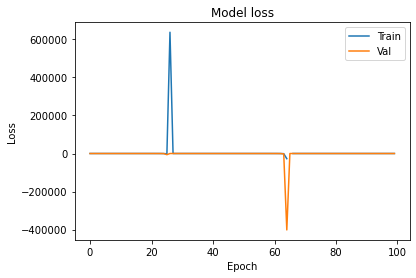

In [141]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Adding Regularization to our Neural Network

In [142]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(8,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
29/29 [==============================] - 2s 53ms/step - loss: -9.3436 - accuracy: 0.3736 - val_loss: -47.5147 - val_accuracy: 0.3807
Epoch 2/100
29/29 [==============================] - 1s 49ms/step - loss: -584.6826 - accuracy: 0.3747 - val_loss: -2099.9316 - val_accuracy: 0.3807
Epoch 3/100
29/29 [==============================] - 2s 56ms/step - loss: -11588.0693 - accuracy: 0.3725 - val_loss: -26331.7969 - val_accuracy: 0.3807
Epoch 4/100
29/29 [==============================] - 2s 57ms/step - loss: -78966.2578 - accuracy: 0.3747 - val_loss: -146833.5781 - val_accuracy: 0.3807
Epoch 5/100
29/29 [==============================] - 2s 52ms/step - loss: -399340.7500 - accuracy: 0.3736 - val_loss: -548123.4375 - val_accuracy: 0.3807
Epoch 6/100
29/29 [==============================] - 2s 55ms/step - loss: -1427603.1250 - accuracy: 0.3747 - val_loss: -2166916.0000 - val_accuracy: 0.3807
Epoch 7/100
29/29 [==============================] - 1s 49ms/step - loss: -4633920.0000 - a

29/29 [==============================] - 1s 47ms/step - loss: -335575384064.0000 - accuracy: 0.3725 - val_loss: -281100353536.0000 - val_accuracy: 0.3807
Epoch 52/100
29/29 [==============================] - 1s 47ms/step - loss: -362431873024.0000 - accuracy: 0.3747 - val_loss: -308222722048.0000 - val_accuracy: 0.3807
Epoch 53/100
29/29 [==============================] - 1s 49ms/step - loss: -399963062272.0000 - accuracy: 0.3780 - val_loss: -331723636736.0000 - val_accuracy: 0.3756
Epoch 54/100
29/29 [==============================] - 1s 50ms/step - loss: -432220241920.0000 - accuracy: 0.3834 - val_loss: -362168778752.0000 - val_accuracy: 0.3807
Epoch 55/100
29/29 [==============================] - 1s 49ms/step - loss: -470621290496.0000 - accuracy: 0.3813 - val_loss: -390468927488.0000 - val_accuracy: 0.3858
Epoch 56/100
29/29 [==============================] - 2s 51ms/step - loss: -508549103616.0000 - accuracy: 0.3725 - val_loss: -422317948928.0000 - val_accuracy: 0.3858
Epoch 57/10

Epoch 100/100
29/29 [==============================] - 1s 48ms/step - loss: -6903428546560.0000 - accuracy: 0.3802 - val_loss: -5626231521280.0000 - val_accuracy: 0.3807


In [143]:
from keras.layers import Dropout
from keras import regularizers

In [144]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(8,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [145]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
29/29 [==============================] - 4s 71ms/step - loss: 7.6739 - accuracy: 0.3693 - val_loss: -38.0148 - val_accuracy: 0.3807
Epoch 2/100
29/29 [==============================] - 2s 64ms/step - loss: -492.7910 - accuracy: 0.3747 - val_loss: -1830.6261 - val_accuracy: 0.3807
Epoch 3/100
29/29 [==============================] - 2s 63ms/step - loss: -9014.8936 - accuracy: 0.3747 - val_loss: -22016.8203 - val_accuracy: 0.3807
Epoch 4/100
29/29 [==============================] - 2s 63ms/step - loss: -77307.1484 - accuracy: 0.3747 - val_loss: -137190.1875 - val_accuracy: 0.3807
Epoch 5/100
29/29 [==============================] - 2s 67ms/step - loss: -448738.0938 - accuracy: 0.3747 - val_loss: -779045.0625 - val_accuracy: 0.3807
Epoch 6/100
29/29 [==============================] - 2s 66ms/step - loss: -1695659.2500 - accuracy: 0.3769 - val_loss: -2480332.2500 - val_accuracy: 0.3807
Epoch 7/100
29/29 [==============================] - 2s 67ms/step - loss: -5223056.5000 - acc

29/29 [==============================] - 2s 58ms/step - loss: -450342289408.0000 - accuracy: 0.3758 - val_loss: -383785631744.0000 - val_accuracy: 0.3807
Epoch 52/100
29/29 [==============================] - 2s 58ms/step - loss: -496933109760.0000 - accuracy: 0.3747 - val_loss: -423114735616.0000 - val_accuracy: 0.3807
Epoch 53/100
29/29 [==============================] - 2s 66ms/step - loss: -552739799040.0000 - accuracy: 0.3769 - val_loss: -460485853184.0000 - val_accuracy: 0.3807
Epoch 54/100
29/29 [==============================] - 2s 69ms/step - loss: -605808885760.0000 - accuracy: 0.3758 - val_loss: -502142500864.0000 - val_accuracy: 0.3807
Epoch 55/100
29/29 [==============================] - 2s 78ms/step - loss: -660382416896.0000 - accuracy: 0.3813 - val_loss: -551056113664.0000 - val_accuracy: 0.3807
Epoch 56/100
29/29 [==============================] - 2s 64ms/step - loss: -716902957056.0000 - accuracy: 0.3758 - val_loss: -605750493184.0000 - val_accuracy: 0.3807
Epoch 57/10

Epoch 100/100
29/29 [==============================] - 2s 60ms/step - loss: -9459453657088.0000 - accuracy: 0.3747 - val_loss: -7371929681920.0000 - val_accuracy: 0.3807
